In [1]:
%load_ext autoreload
%autoreload 2

%load_ext dotenv
%dotenv ../.env.local

In [2]:
from anthropic import Anthropic

import os
from pathlib import Path
import json

from utils import build_message_list, parse_xml_response

In [3]:
client = Anthropic(
    api_key=os.environ.get('ANTHROPIC_API_KEY'),
)

MODEL_NAME = "claude-3-5-sonnet-20240620"

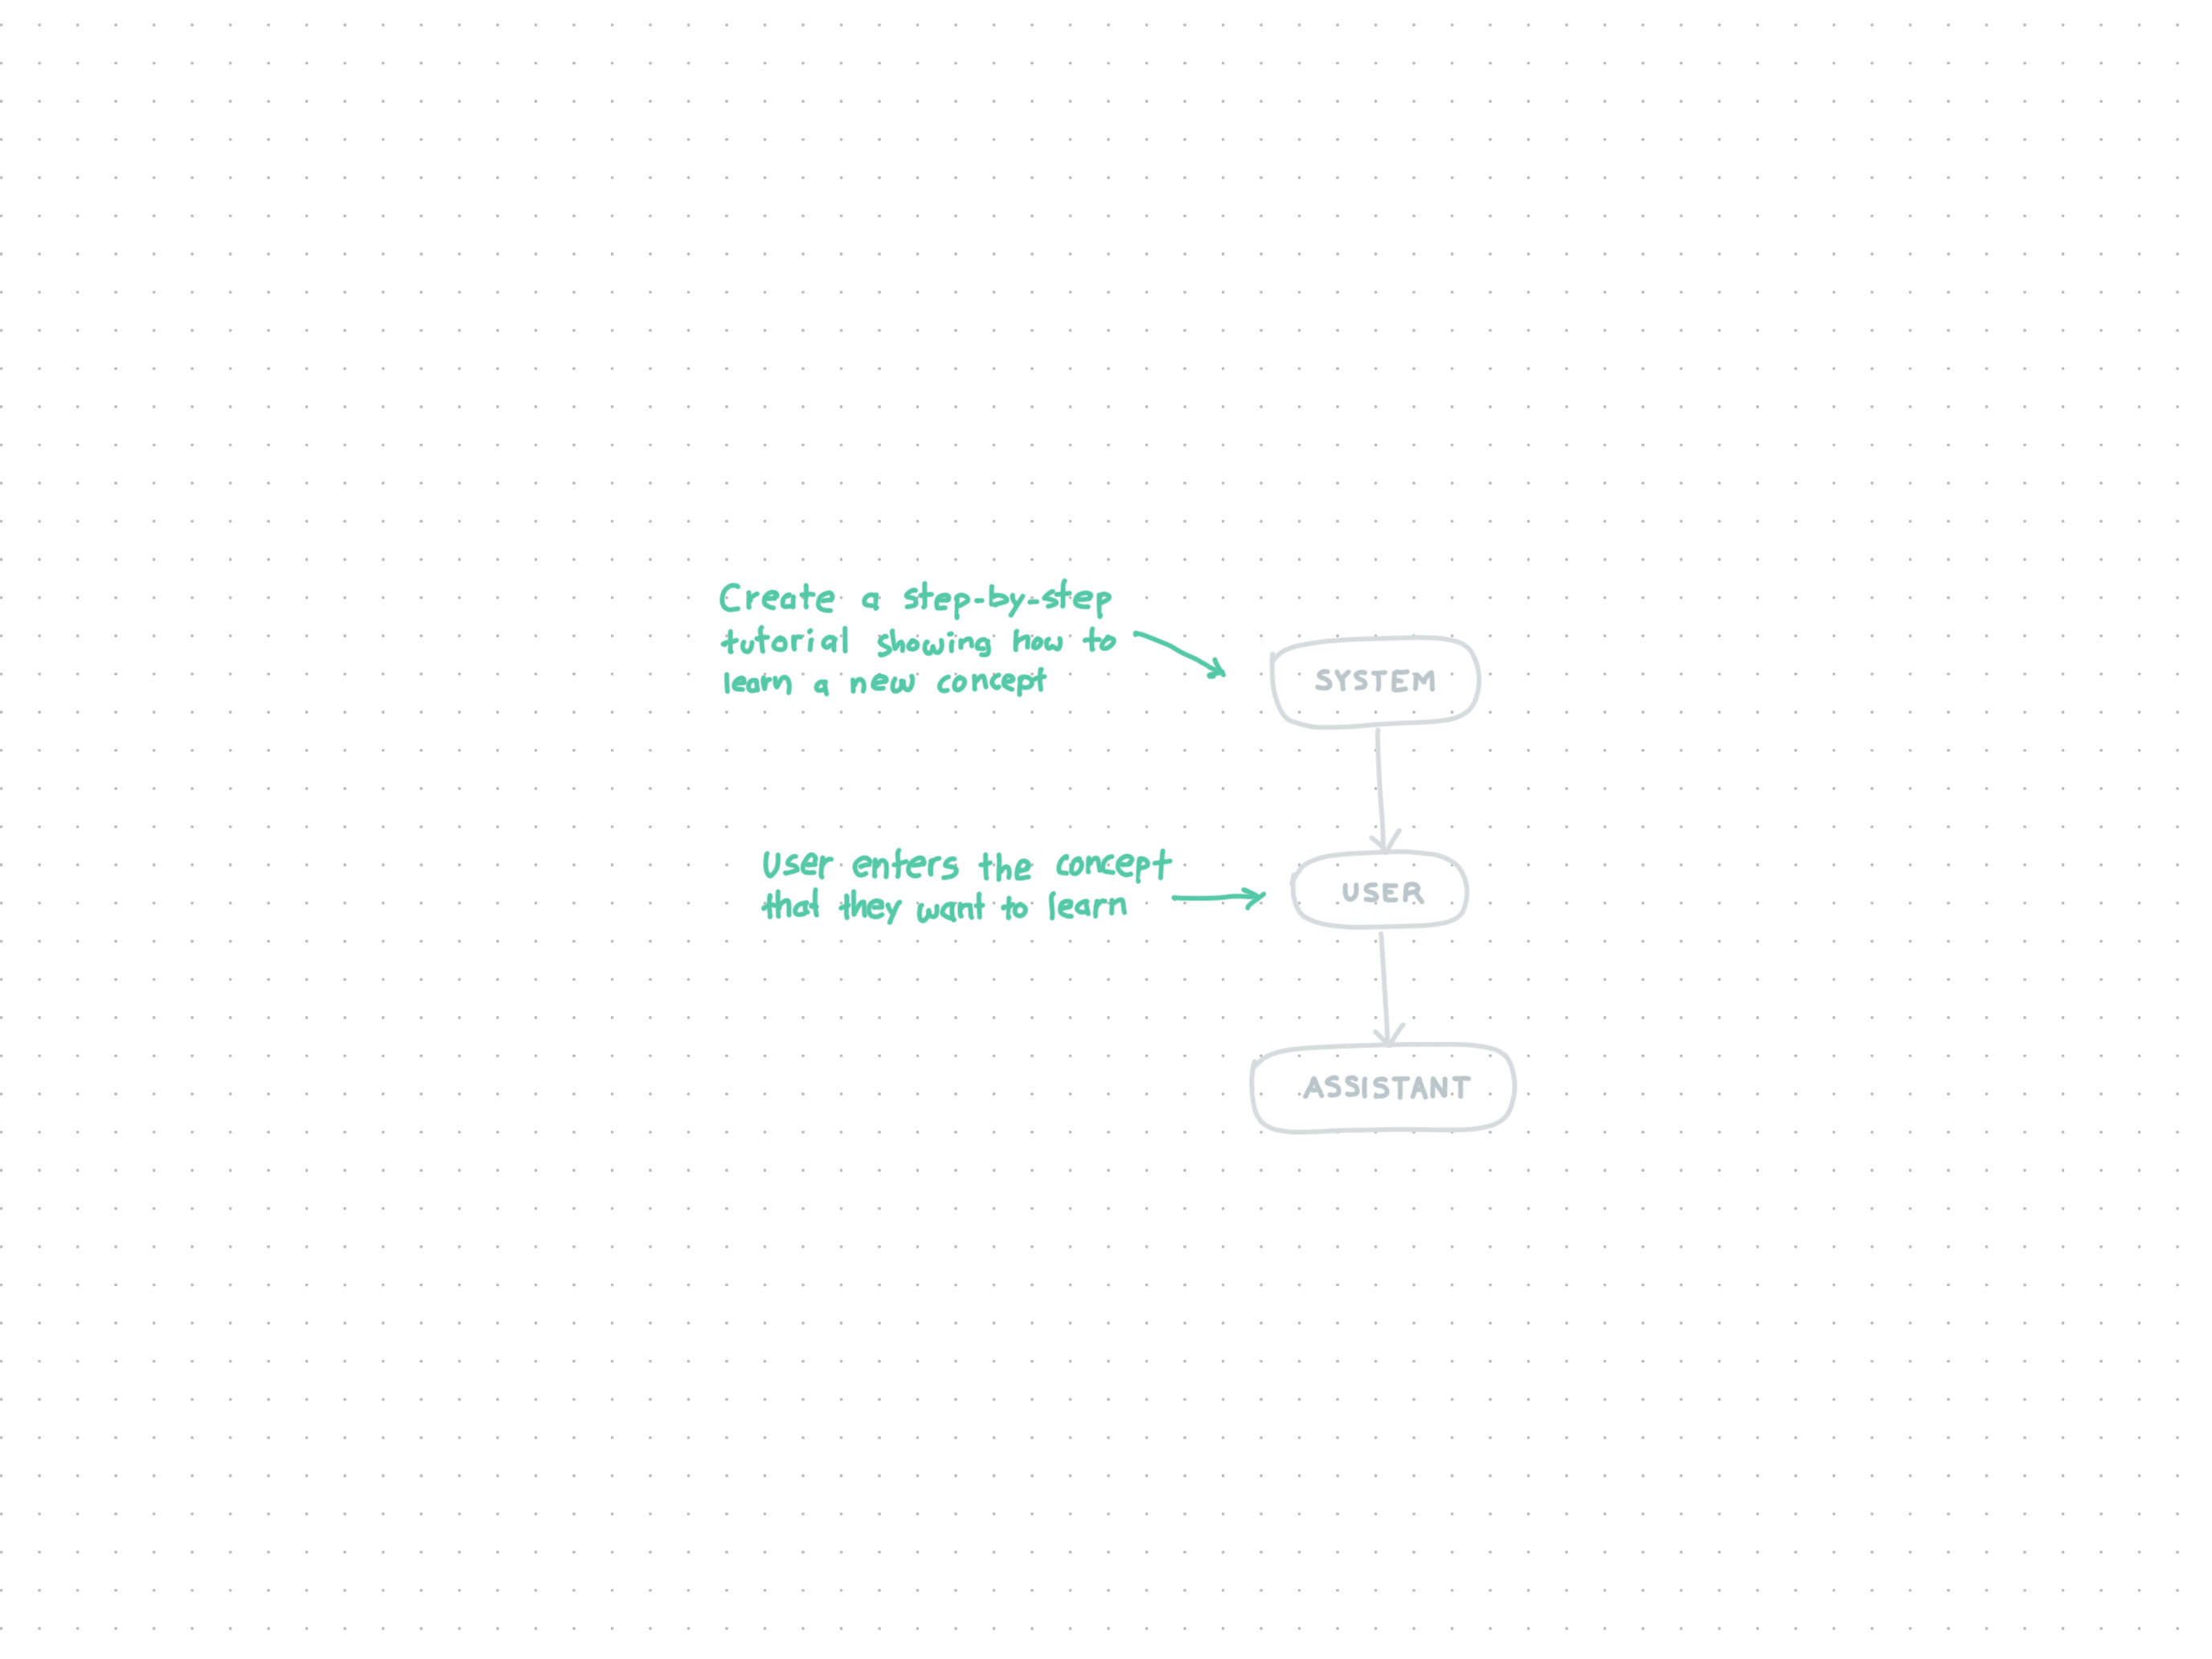

In [4]:
from IPython.display import Image

IMAGE_FILE = '../data/images/metaprompt.png'
Image(filename=IMAGE_FILE) 

In [5]:
system_prompt = '''You are a AI engineer working on a prompt workflow. 
You have been tasked with creating a JSON Canvas diagram that shows the flow of prompts from a handwritten sketch.
Start by creating lists of nodes and edges based on the sketch.
Pay attention to the colors of the text boxes in the sketch. Each color represents a different type of node in the JSON Canvas diagram.
Pay attention to the direction of the arrows in the sketch. The start of the arrow represents the "from" node and the end of the arrow represents the "to" node.
There should be no floating nodes in the JSON Canvas diagram. 
Every node should be connected to at least one other node.
All system prompts MUST connect to a user prompt.
All user prompts MUST connect to an assistant response.
Green metaprompts connect to a system prompt or a user prompt but not both. 
The green arrow should be connected to the prompt that the metaprompt is modifying.
If no assistant response is present, you should add one.

Here is an example output with lists of nodes and edges followed by a JSON Canvas diagram:

<nodes>
There is a group node with the label "Cannoli" at the top of the canvas.
There is a text node with the text "Hello world!" at the top left of the canvas.
There is a purple text node with no text at the bottom left of the canvas.
There is a text node with the text "The purple node is a content node. Content nodes can be used to store and display text that can be read or written by you or another node." at the top right of the canvas.
There is a text node with the text "The colorless, green, or yellow node is a call node. Call nodes make a chat completion call to the LLM with the text of the node as a user message." at the bottom right of the canvas.
There is a text node with the text "If a node in a cannoli is floating (no arrows attached) it won't affect the cannoli unless it is formatted in a special way we'll go over later." at the middle left of the canvas.
There is a text node with the text "This is a Cannoli. It's made up of different types of nodes and arrows. Try running it by clicking the Cannoli button in the control ribbon on the left side of your Obsidian window." at the bottom left of the canvas.
There is a text node with the text "Cannolis can be run in several ways: Click the Cannoli ribbon icon If you're on a canvas file, it will be run as a cannoli If you're on a note with a "cannoli" property, the canvas file in that property will be run as a cannoli Run the "Start/Stop cannoli" command in the command palette (functions the same as the ribbon icon) If a canvas file name ends with ".cno", it will have its own run command in the command palette Make an audio recording on a note with a "cannoli" property That recording will be transcribed, replace the reference, and trigger the cannoli defined in the property." at the top right of the canvas.
</nodes>

<edges>
There is an edge connecting the text node with the text "Hello world!" to the empty text node at the bottom left of the canvas.
</edges>

<canvas>
{
	"nodes":[
		{"type":"group","id":"161279baf7763214","x":-174,"y":-160,"width":394,"height":340,"label":"Cannoli"},
		{"type":"text","text":"Hello world!","id":"dc3f9351f787531e","x":-97,"y":-91,"width":250,"height":60},
		{"type":"text","text":"","id":"bc1a550bbb4aac7b","x":-97,"y":60,"width":250,"height":60,"color":"6"},
		{"type":"text","text":"The purple node is a content node. Content nodes can be used to store and display text that can be read or written by you or another node.","id":"f77169b141243e65","x":240,"y":30,"width":420,"height":120},
		{"type":"text","text":"The colorless, green, or yellow node is a call node. Call nodes make a chat completion call to the LLM with the text of the node as a user message.","id":"0af5a453bd4d6ec9","x":240,"y":-110,"width":380,"height":120},
		{"type":"text","text":"If a node in a cannoli is floating (no arrows attached) it won't affect the cannoli unless it is formatted in a special way we'll go over later.","id":"7d005c80299f3674","x":-202,"y":220,"width":461,"height":112},
		{"type":"text","text":"This is a Cannoli. It's made up of different types of nodes and arrows.\n\nTry running it by clicking the Cannoli button in the control ribbon on the left side of your Obsidian window.","id":"24dd96c964700992","x":-147,"y":-400,"width":350,"height":180},
		{"type":"text","text":"Cannolis can be run in several ways:\n\n- Click the Cannoli ribbon icon\n    - If you're on a canvas file, it will be run as a cannoli\n    - If you're on a note with a \"cannoli\" property, the canvas file in that property will be run as a cannoli\n- Run the \"Start/Stop cannoli\" command in the command palette (functions the same as the ribbon icon)\n- If a canvas file name ends with \".cno\", it will have its own run command in the command palette\n- Make an audio recording on a note with a \"cannoli\" property\n\t- That recording will be transcribed, replace the reference, and trigger the cannoli defined in the property.","id":"927cf33512b0dfc1","x":-740,"y":-182,"width":538,"height":402}
	],
	"edges":[
		{"id":"23c2d7dffb49bf75","fromNode":"dc3f9351f787531e","fromSide":"bottom","toNode":"bc1a550bbb4aac7b","toSide":"top"}
	]
}
</canvas>

EVERY text box in the sketch which has a color must be specified in the node's JSON object as follows:

<colors>
Red: {"type":"text", ... , "color":"1"}
Orange: {"type":"text", ... , "color":"2"}
Yellow: {"type":"text", ... , "color":"3"}
Green: {"type":"text", ... , "color":"4"}
Blue: {"type":"text", ... , "color":"5"}
Purple: {"type":"text", ... , "color":"6"}
</colors>
'''

user_prompt = '''Create a JSON Canvas from this sketch.'''

message_list = build_message_list(IMAGE_FILE, user_prompt)

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    system=system_prompt,
    messages=message_list,
	temperature=0.0,
)
print(response.content[0].text)

Based on the sketch provided, I'll create a JSON Canvas diagram with the appropriate nodes and edges. Here's the breakdown:

<nodes>
1. There is a green text node with the content "Create a step-by-step tutorial showing how to learn a new concept" on the left side of the canvas.
2. There is a white text node labeled "SYSTEM" on the right side, connected to the green node.
3. There is a green text node with the content "User enters the concept that they want to learn" below the first green node.
4. There is a white text node labeled "USER" connected to the second green node and below the "SYSTEM" node.
5. There is a white text node labeled "ASSISTANT" at the bottom, connected to the "USER" node.
</nodes>

<edges>
1. An edge connecting the first green node to the "SYSTEM" node.
2. An edge connecting the second green node to the "USER" node.
3. An edge connecting the "SYSTEM" node to the "USER" node.
4. An edge connecting the "USER" node to the "ASSISTANT" node.
</edges>

Now, I'll create

In [6]:

META_PROMPT = Path('../data/prompts/meta.prompt').read_text()


def build_meta_prompt(task, variable_string=''):


    prompt = META_PROMPT.replace("{{TASK}}", task)
    assistant_partial = "<Inputs>"
    if variable_string:
        assistant_partial += variable_string + "\n</Inputs>\n<Instructions Structure>"

    meta_response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=4096,
        messages=[
            {
                "role": "user",
                "content":  prompt
            },
            {
                "role": "assistant",
                "content": assistant_partial
            }
        ],
        temperature=0
    )

    return meta_response.content[0].text


task = 'Create a step-by-step tutorial showing how to learn a new concept'
print(build_meta_prompt(task))



{$CONCEPT}
{$LEARNING_STYLE}
</Inputs>

<Instructions Structure>
1. Introduce the task and explain the inputs
2. Provide instructions for creating a step-by-step tutorial
3. Outline the structure for the tutorial
4. Give guidance on adapting the tutorial to different learning styles
5. Instruct on formatting and presentation
6. Provide examples of good practices
7. Request the final output in specific XML tags
</Instructions Structure>

<Instructions>
You are tasked with creating a step-by-step tutorial to help someone learn a new concept. The tutorial should be tailored to the learner's preferred learning style. You will be provided with two inputs:

<concept>
{$CONCEPT}
</concept>

<learning_style>
{$LEARNING_STYLE}
</learning_style>

To create an effective tutorial, follow these instructions:

1. Analyze the concept and break it down into manageable parts or sub-concepts.

2. Consider the provided learning style and think about how to best present the information to cater to that s

In [7]:
obsidian_vault = Path(os.environ.get('OBSIDIAN_VAULT'))
output_file = obsidian_vault / 'metaprompt.canvas'

json_data = parse_xml_response(response)
for node in json_data['nodes']:
    if node['type'] == 'text' and 'color' in node and node['color'] == '4':
        node['text'] = build_meta_prompt(node['text'])

with open(output_file, 'w') as f:
    f.write(json.dumps(json_data, indent=4))

In [54]:
for node in json_data['nodes']:
    if node['type'] == 'text' and node['text'].lower().strip() == 'assistant':
        node['text'] = ''
        node['color'] = '6'

with open(output_file, 'w') as f:
    f.write(json.dumps(json_data, indent=4))

In [55]:
json_data

{'nodes': [{'type': 'text',
   'text': "\n{$CONCEPT}\n</Inputs>\n\n<Instructions Structure>\n- Introduction explaining the purpose of the instructions\n- Ask the AI to write down the concept it will be teaching inside <concept> tags\n- Provide step-by-step instructions for the AI to follow to create the tutorial, including:\n  - Researching the concept and gathering key information \n  - Breaking down the concept into smaller, more manageable parts\n  - Explaining each part in detail with examples\n  - Providing practice exercises or questions to reinforce understanding\n  - Summarizing the key takeaways \n- Remind the AI to present the information in a clear, engaging way suitable for beginners\n- Have the AI output the final tutorial inside <tutorial> tags\n</Instructions Structure>\n\n<Instructions>\nYou will be creating a step-by-step tutorial to teach a beginner how to learn a new concept. The goal is to break the concept down into understandable parts, explain each part in detail